<a href="https://colab.research.google.com/github/wozzin/AI_ML/blob/main/Logistic_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

cancer = load_breast_cancer()
cancer.data.shape
cancer.target_names

X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

(426, 30)

In [ ]:
# 모델적용
model = LogisticRegression(C=1, max_iter=10000).fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.960093896713615, 0.951048951048951)

In [ ]:
# C값 변화로 결과 비교
# 모델적용
model = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)
# test값 비슷 /  train 값만 크게상승 ==> 과대적합에 가까워짐을 확인할 수 있음
# cancer 데이터 상으로 C값의 과도한 상승은 과대적합을 만드는 데이터임을 보여줌
# C = 0.1~ 미만일시 test값이 더 높아졌따 -> 과소적합 / 과도하게 내릴 시 score값 결과 자체가 낮아짐을 확인

(0.9812206572769953, 0.958041958041958)

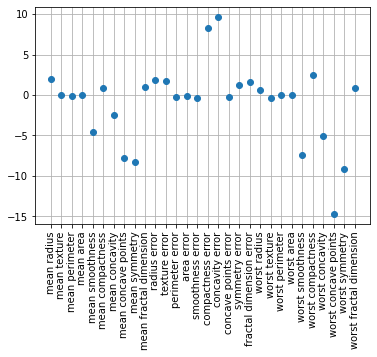

In [ ]:
# 다른 C 값의 결과 추가
plt.xticks(range(30), cancer.feature_names, rotation=90)
plt.plot(model.coef_.T, 'o')
plt.grid()
plt.show()
# coef == x 값의 변화 column 확인가능 / 높은 항목

0.9812206572769953 0.958041958041958
0.960093896713615 0.951048951048951
0.9530516431924883 0.9440559440559441


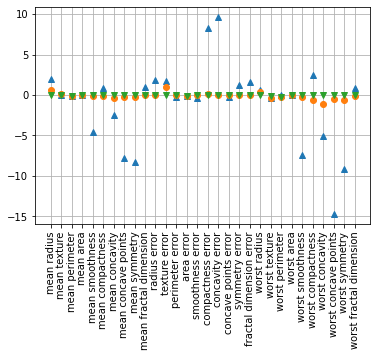

In [49]:
# 실습 - 가중치 변화에 따른 시각화
for C, marker in zip( [100, 1, 0.01], ['^', 'o', 'v'] ):
  model = LogisticRegression(C=C, max_iter=10000).fit(X_train, y_train)
  print( model.score(X_train, y_train), model.score(X_test, y_test) )
  plt.plot(model.coef_.T, marker)

plt.xticks(range(30), cancer.feature_names, rotation=90)
plt.grid()
plt.show()

In [ ]:
model_l1 = LogisticRegression(C=1, penalty='l1', solver='liblinear', max_iter=100000)
model_l1.fit(X_train, y_train)

print('사용한 특성 수:', np.sum(model_l1.coef_ != 0) )
model_l1.score(X_train, y_train), model_l1.score(X_test, y_test)

사용한 특성 수: 11


(0.9624413145539906, 0.958041958041958)